In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [94]:
# Charger les données
data = pd.read_excel("resultats-par-niveau-subcom-t2-france-entiere.xlsx")
#print(data.head())

In [95]:
# Filtrer les données pour votre commune spécifique
commune = data['Libellé de la commune']
# Charger les données des élections présidentielles pour cette commune
donnees_elections = {
    "MACRON Emmanuel": data['% Voix/Exp'],
    "LE PEN Marine": data.iloc[:, -1]
}

In [96]:
france_map = gpd.read_file('Carte/communes-20220101.shp')

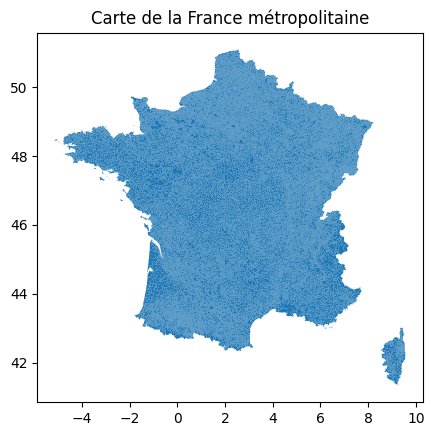

In [97]:
# Filtrer les données pour n'inclure que la France métropolitaine
france_metrop = france_map[~france_map['insee'].str.startswith(('97', '98'))]

# Afficher la carte de la France métropolitaine
fig, ax = plt.subplots()
france_metrop.plot(ax=ax)
ax.set_title('Carte de la France métropolitaine')
plt.show()


971


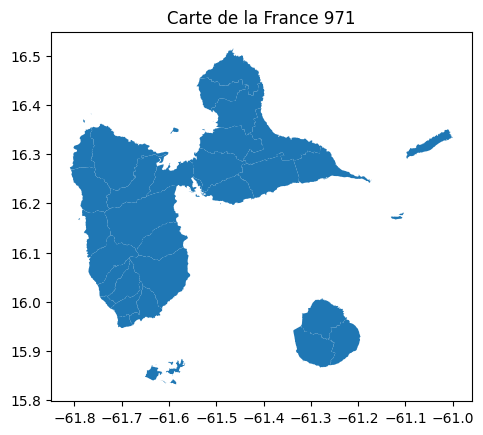

972


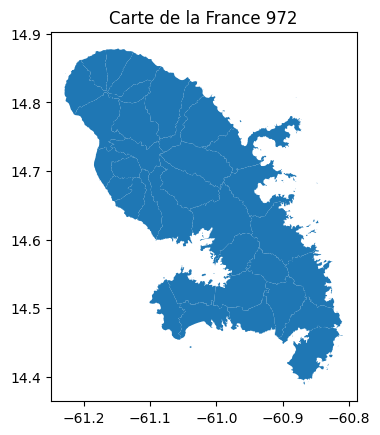

973


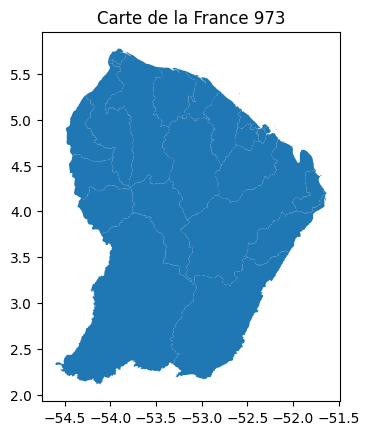

974


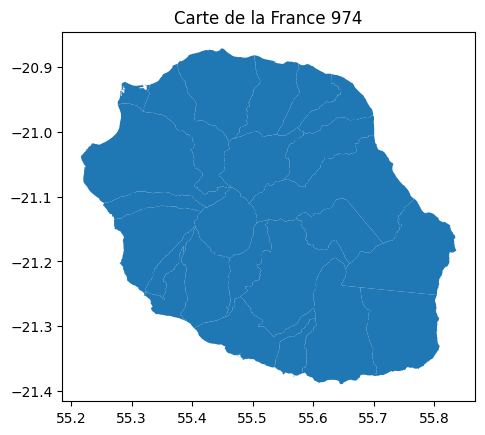

976


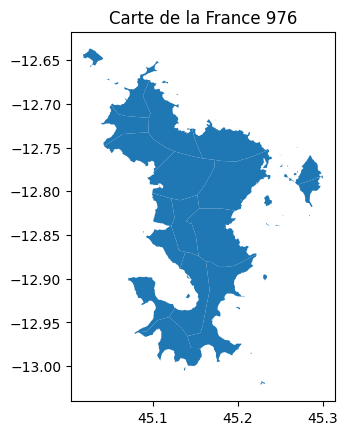

In [98]:

def afficherCarteDOMTOM():
    #Liste Dom Tom complet
    #ListDomTom= ['971','972','973', '974', '975', '976', '977', '978', '986', '987', '988', '984', '989']
    #Liste Dom Tom qui sont non null
    ListDomTom= ['971','972','973', '974','976']
    for i in ListDomTom:
        print (i)
        domtom = france_map[france_map['insee'].str.startswith(i)]
        fig, ax = plt.subplots()
        domtom.plot(ax=ax)
        ax.set_title('Carte de la France '+ i)
        plt.show()
afficherCarteDOMTOM()

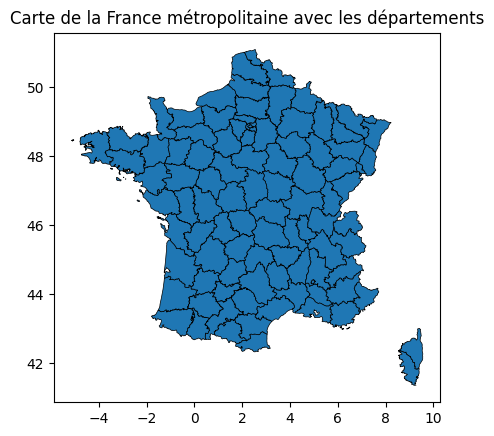

In [99]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Filtrer les données pour n'inclure que la France métropolitaine
france_metrop = departements[~departements['code'].str.startswith(('97', '98'))]

# Afficher la carte de la France métropolitaine avec les départements
fig, ax = plt.subplots()
france_metrop.plot(ax=ax, edgecolor='k', linewidth=0.5) # Couleur des contours et épaisseur des lignes
ax.set_title('Carte de la France métropolitaine avec les départements')
plt.show()


  Unnamed: 0              Departement  Ensemble  Hommes  Femmes  15-24 ans  \
0         01                      Ain       5.5     5.3     5.6       13.2   
1         02                    Aisne      10.5    10.5    10.4       27.9   
2         03                   Allier       7.7     7.9     7.4       19.0   
3         04  Alpes-de-Haute-Provence       8.2     8.3     8.2       21.2   
4         05             Hautes-Alpes       6.9     7.1     6.7       17.0   

   25-49 ans  50 ans ou plus  
0        5.0             3.9  
1        8.9             7.1  
2        6.7             5.7  
3        7.9             5.5  
4        6.8             4.5  


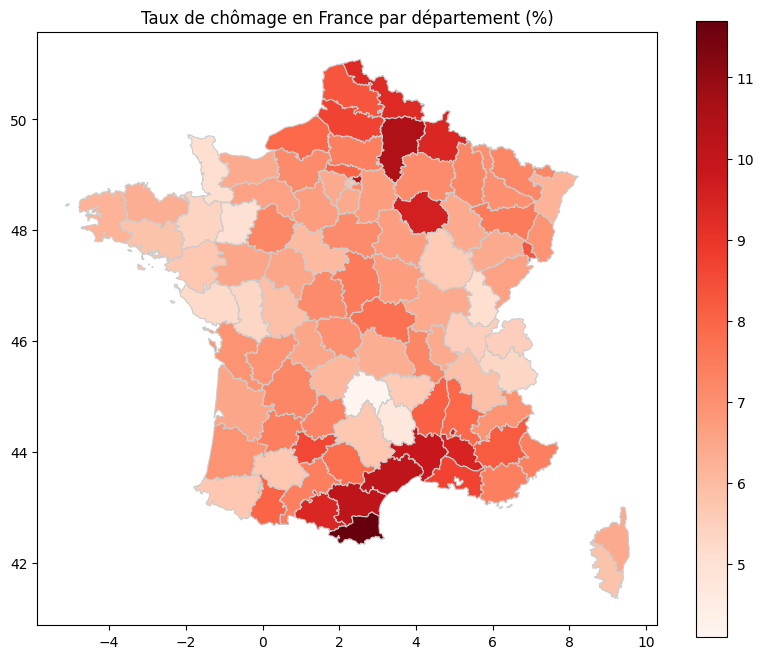

In [100]:
#Taux de chaumage par departement

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_tauchomage = pd.read_excel('AutreData/tauxChomage.xlsx')

print(df_tauchomage.head())
# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de taux de chômage avec les données géographiques des départements
departements = departements.merge(df_tauchomage, left_on='code', right_on='Unnamed: 0')

# Afficher la carte de la France par département avec une heatmap des valeurs de taux de chômage
fig, ax = plt.subplots(figsize=(10, 8))
departements.plot(column='Ensemble', cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Taux de chômage en France par département (%)')
plt.show()





  Code du département Libellé du département  Code de la circonscription  \
0                  01                    Ain                           4   
1                  01                    Ain                           5   
2                  01                    Ain                           5   
3                  01                    Ain                           5   
4                  01                    Ain                           5   

  Libellé de la circonscription  Code de la commune    Libellé de la commune  \
0          4ème circonscription                   1  L'Abergement-Clémenciat   
1          5ème circonscription                   2    L'Abergement-de-Varey   
2          5ème circonscription                   4        Ambérieu-en-Bugey   
3          5ème circonscription                   4        Ambérieu-en-Bugey   
4          5ème circonscription                   4        Ambérieu-en-Bugey   

  Code du b.vote  Inscrits  Abstentions  % Abs/Ins  ...  Unnam

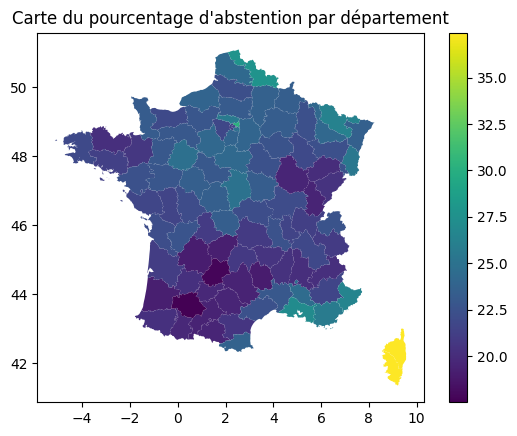

In [101]:
#Abstention 1er tour
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_abstention = pd.read_excel('AutreData/resultats-par-niveau-burvot-t1-france-entiere.xlsx')
print(df_abstention.head())


# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Calculer la moyenne du pourcentage d'abstention pour chaque département
abstention_moyenne_par_departement = df_abstention.groupby('Code du département')['% Abs/Ins'].mean().reset_index()

# Renommer les colonnes pour la fusion
abstention_moyenne_par_departement = abstention_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Abs/Ins': 'Pourcentage_Abstention'})

# Fusionner les données d'abstention avec les données géographiques des départements
departements = departements.merge(abstention_moyenne_par_departement, on='code')

# Afficher la carte avec les données d'abstention
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Abstention', ax=ax, legend=True)
ax.set_title("Carte du pourcentage d'abstention par département")
plt.show()


  Code du département Libellé du département  Code de la commune  \
0                  01                    Ain                   1   
1                  01                    Ain                   2   
2                  01                    Ain                   4   
3                  01                    Ain                   5   
4                  01                    Ain                   6   

     Libellé de la commune Etat saisie  Inscrits  Abstentions  % Abs/Ins  \
0  L'Abergement-Clémenciat     Complet       643          146      22.71   
1    L'Abergement-de-Varey     Complet       213           45      21.13   
2        Ambérieu-en-Bugey     Complet      8763         2448      27.94   
3      Ambérieux-en-Dombes     Complet      1282          266      20.75   
4                  Ambléon     Complet       103           19      18.45   

   Votants  % Vot/Ins  ...  Voix  % Voix/Ins  % Voix/Exp  Unnamed: 26  \
0      497      77.29  ...   237       36.86       52.67     

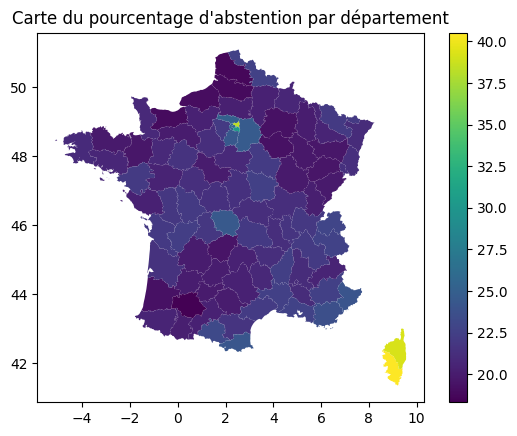

In [102]:
#Abstention 1er tour
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_abstention = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')
print(df_abstention.head())


# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Calculer la moyenne du pourcentage d'abstention pour chaque département
abstention_moyenne_par_departement = df_abstention.groupby('Code du département')['% Abs/Ins'].mean().reset_index()

# Renommer les colonnes pour la fusion
abstention_moyenne_par_departement = abstention_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Abs/Ins': 'Pourcentage_Abstention'})

# Fusionner les données d'abstention avec les données géographiques des départements
departements = departements.merge(abstention_moyenne_par_departement, on='code')

# Afficher la carte avec les données d'abstention
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Abstention', ax=ax, legend=True)
ax.set_title("Carte du pourcentage d'abstention par département")
plt.show()


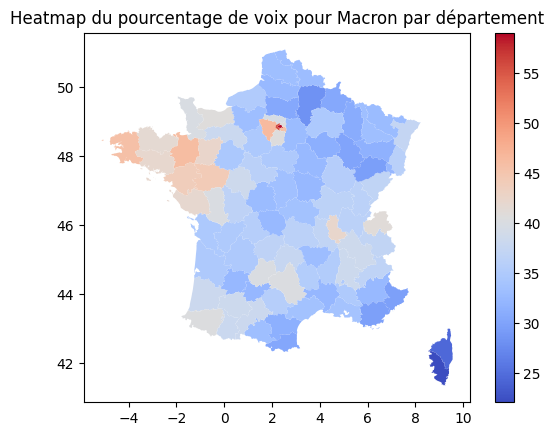

In [103]:
#Heatmap Macron
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')

# Sélectionner les colonnes pertinentes
df_macron = df_resultats[['Code du département', '% Voix/Ins']]

# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
macron_moyenne_par_departement = df_macron.groupby('Code du département')['% Voix/Ins'].mean().reset_index()

# Renommer les colonnes pour la fusion
macron_moyenne_par_departement = macron_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins': 'Pourcentage_Macron'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(macron_moyenne_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Macron', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage de voix pour Macron par département")
plt.show()


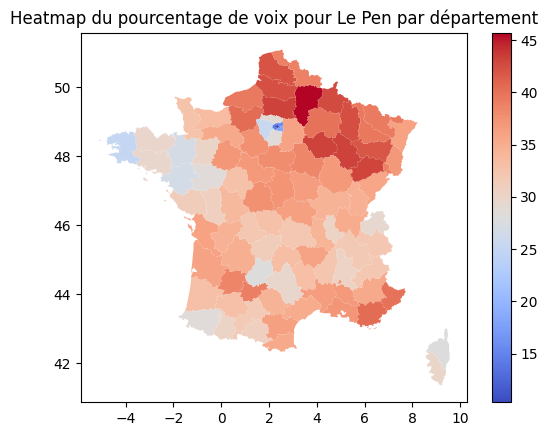

In [104]:
#Heatmap Le Pen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')

# Sélectionner les colonnes pertinentes
df_lepen = df_resultats[['Code du département', '% Voix/Ins2']]

# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
lepen_moyenne_par_departement = df_lepen.groupby('Code du département')['% Voix/Ins2'].mean().reset_index()

# Renommer les colonnes pour la fusion
lepen_moyenne_par_departement = lepen_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins2': 'Pourcentage_LePenn'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(lepen_moyenne_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_LePenn', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage de voix pour Le Pen par département")
plt.show()


0    45.717572
1    43.222715
2    33.489129
3    33.220000
4    37.592986
Name: Pourcentage_LePen, dtype: float64
0    28.182378
1    31.186056
2    40.763333
3    37.562927
4    34.700986
Name: Pourcentage_Macron, dtype: float64


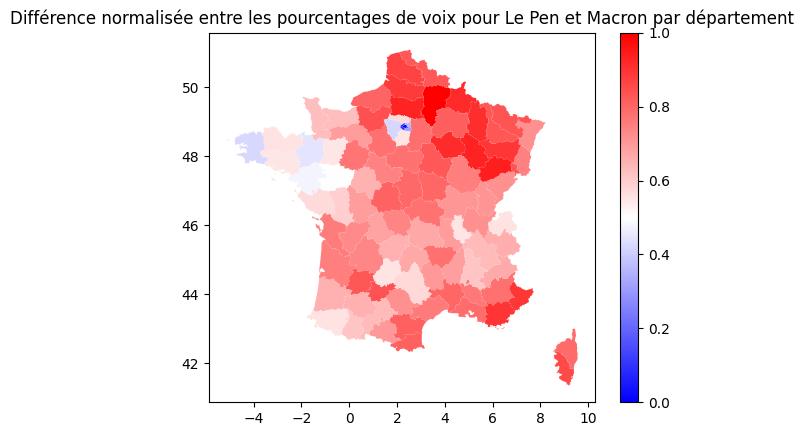

In [105]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/resultats-par-niveau-subcom-t2-france-entiere.xlsx')

# Sélectionner les colonnes pertinentes pour Macron
df_macron = df_resultats[['Code du département', '% Voix/Ins']]

# Sélectionner les colonnes pertinentes pour Le Pen
df_lepen = df_resultats[['Code du département', '% Voix/Ins2']]

# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
macron_moyenne_par_departement = df_macron.groupby('Code du département')['% Voix/Ins'].mean().reset_index()

# Calculer la moyenne du pourcentage de voix pour Le Pen pour chaque département
lepen_moyenne_par_departement = df_lepen.groupby('Code du département')['% Voix/Ins2'].mean().reset_index()

# Renommer les colonnes pour la fusion
macron_moyenne_par_departement = macron_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins': 'Pourcentage_Macron'})
lepen_moyenne_par_departement = lepen_moyenne_par_departement.rename(columns={'Code du département': 'code', '% Voix/Ins2': 'Pourcentage_LePen'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(macron_moyenne_par_departement, on='code')

# Fusionner les données de pourcentage de voix pour Le Pen avec les données géographiques des départements
departements = departements.merge(lepen_moyenne_par_departement, on='code')

print(departements['Pourcentage_LePen'].head())
print(departements['Pourcentage_Macron'].head())

# Calculer la différence entre les pourcentages de vote pour Le Pen et Macron
departements['Difference_LePen_Macron'] = departements['Pourcentage_LePen'] - departements['Pourcentage_Macron']

# Normaliser la différence pour qu'elle soit dans la plage [0, 1]
departements['Difference_Normalisee'] = (departements['Difference_LePen_Macron'] - departements['Difference_LePen_Macron'].min()) / (departements['Difference_LePen_Macron'].max() - departements['Difference_LePen_Macron'].min())

# Définir une colormap personnalisée allant de bleu à blanc à rouge
colors = [(0, 'blue'), (0.5, 'white'), (1, 'red')]
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Afficher la heatmap combinée
fig, ax = plt.subplots(1, 1)
departements.plot(column='Difference_Normalisee', cmap=cmap, ax=ax, legend=True)
ax.set_title("Différence normalisée entre les pourcentages de voix pour Le Pen et Macron par département")
plt.show()


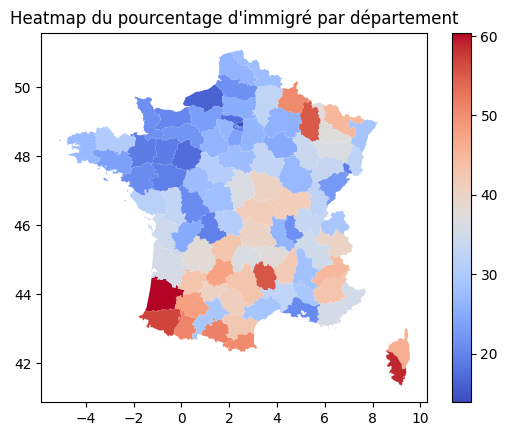

In [106]:
#Heatmap Le Pen
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/PopImmigré.xlsx')

# Sélectionner les colonnes pertinentes
df_pourcent_immigre = df_resultats[['Code du département', 'Part des immigrés nés dans l\'Union européenne (en %)']]


# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
pourcent_immigre_par_departement = df_pourcent_immigre.groupby('Code du département')['Part des immigrés nés dans l\'Union européenne (en %)'].mean().reset_index()

# Renommer les colonnes pour la fusion
pourcent_immigre_par_departement = pourcent_immigre_par_departement.rename(columns={'Code du département': 'code', 'Part des immigrés nés dans l\'Union européenne (en %)': 'Pourcentage_Immigre'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(pourcent_immigre_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Immigre', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage d'immigré par département")
plt.show()


  Code du département               Unnamed: 1  Nombre d'immigrés  \
0                  01                      Ain            79312.0   
1                  02                    Aisne            25515.0   
2                  03                   Allier            17601.0   
3                  04  Alpes-de-Haute-Provence            13762.0   
4                  05             Hautes-Alpes             8019.0   

   Part dans la pop. (en %)  \
0                      12.1   
1                       4.8   
2                       5.2   
3                       8.3   
4                       5.7   

   Part des immigrés nés dans l'Union européenne (en %)  \
0                                               33.3      
1                                               32.5      
2                                               41.5      
3                                               43.0      
4                                               44.6      

   Part des immigrés nés en Algérie (en %) 

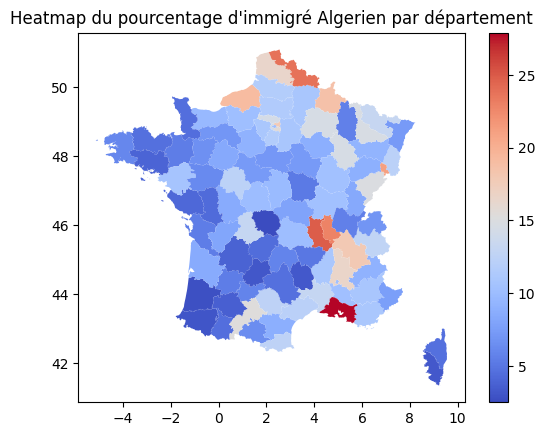

In [107]:
#Heatmap Immigre Algerien
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/PopImmigré.xlsx')

print(df_resultats.head())
# Sélectionner les colonnes pertinentes
df_pourcent_immigre = df_resultats[['Code du département', 'Part des immigrés nés en Algérie (en %)']]



# Calculer la moyenne du pourcentage de voix pour Macron pour chaque département
pourcent_immigre_par_departement = df_pourcent_immigre.groupby('Code du département')['Part des immigrés nés en Algérie (en %)'].mean().reset_index()

# Renommer les colonnes pour la fusion
pourcent_immigre_par_departement = pourcent_immigre_par_departement.rename(columns={'Code du département': 'code', 'Part des immigrés nés en Algérie (en %)': 'Pourcentage_Immigre'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage de voix pour Macron avec les données géographiques des départements
departements = departements.merge(pourcent_immigre_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Immigre', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage d'immigré Algerien par département")
plt.show()


C:\Users\Delmas Clément\AppData\Local\Temp\ipykernel_16956\2053698255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pourcent_immigre['Sum_Immigres_Magreb'] = df_resultats['Part des immigrés nés en Algérie (en %)'] + df_resultats['Part des immigrés nés au Maroc (en %)'] + df_resultats['Part des immigrés nés en Tunisie (en %)']


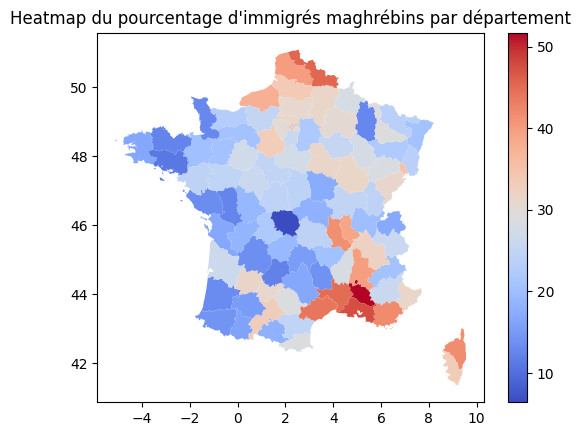

In [108]:
# Immigrés maghrébins

# Ajouter les colonnes pertinentes
df_pourcent_immigre['Sum_Immigres_Magreb'] = df_resultats['Part des immigrés nés en Algérie (en %)'] + df_resultats['Part des immigrés nés au Maroc (en %)'] + df_resultats['Part des immigrés nés en Tunisie (en %)']

# Calculer la moyenne du pourcentage total d'immigrés maghrébins pour chaque département
pourcent_immigre_maghreb_par_departement = df_pourcent_immigre.groupby('Code du département')['Sum_Immigres_Magreb'].mean().reset_index()

# Renommer les colonnes pour la fusion
pourcent_immigre_maghreb_par_departement = pourcent_immigre_maghreb_par_departement.rename(columns={'Code du département': 'code', 'Sum_Immigres_Magreb': 'Pourcentage_Immigres_Maghreb'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de pourcentage total d'immigrés maghrébins avec les données géographiques des départements
departements = departements.merge(pourcent_immigre_maghreb_par_departement, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Pourcentage_Immigres_Maghreb', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du pourcentage d'immigrés maghrébins par département")
plt.show()


  Code              Département  Taux de pauvreté (en %)
0   01                      Ain                     10.3
1   02                    Aisne                     18.4
2   03                   Allier                     15.5
3   04  Alpes-de-Haute-Provence                     16.8
4   05             Hautes-Alpes                     13.9


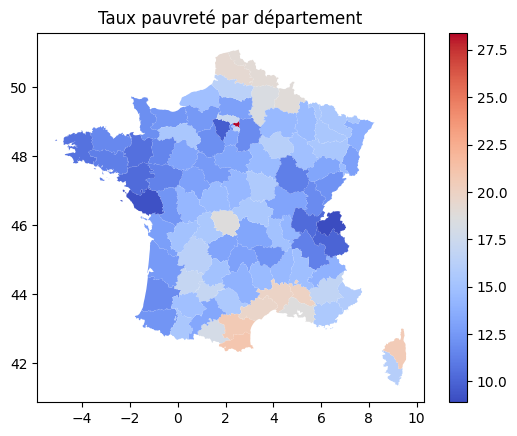

In [109]:
#Heatmap taux pauvreté
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/ecartTypeRevenue.xlsx', sheet_name=1)

print(df_resultats.head())




# Sélectionner les colonnes pertinentes
df_taux_pauvrete = df_resultats[['Code', 'Taux de pauvreté (en %)']]

# Renommer les colonnes pour la fusion
df_taux_pauvrete = df_taux_pauvrete.rename(columns={'Code': 'code', 'Taux de pauvreté (en %)': 'Taux_Pauvrete'})


# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de taux de pauvreté avec les données géographiques des départements
departements = departements.merge(df_taux_pauvrete, on='code')




fig, ax = plt.subplots(1, 1)
departements.plot(column='Taux de pauvreté (en %)', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Taux pauvreté par département")
plt.show()






  Code               Unnamed: 1  Ensemble  Part des femmes (en %)  \
0   01                      Ain  679498.0                    50.6   
1   02                    Aisne  521632.0                    51.0   
2   03                   Allier  332708.0                    51.8   
3   04  Alpes-de-Haute-Provence  168161.0                    51.6   
4   05             Hautes-Alpes  141661.0                    51.5   

   Part des hommes (en %)  Part des 0 à 24 ans (en %)  \
0                    49.4                        29.9   
1                    49.0                        29.3   
2                    48.2                        24.6   
3                    48.4                        24.3   
4                    48.5                        23.7   

   Part des 25 à 59 ans (en %)  Part des 60 ans ou plus (en %)  \
0                         44.6                            25.4   
1                         41.6                            29.1   
2                         38.8              

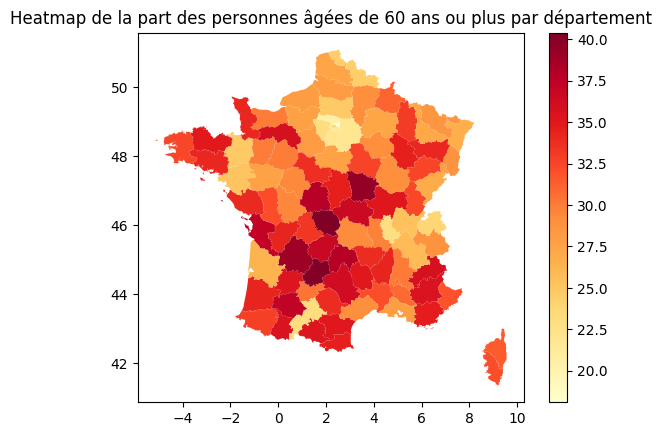

In [110]:
#Heatmap taux pauvreté
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/MoyenneAgeDepartement.xlsx')

print(df_resultats.head())



# Sélectionner les colonnes pertinentes
df_part_60_plus = df_resultats[['Code', 'Part des 60 ans ou plus (en %)']]

# Renommer les colonnes pour la fusion
df_part_60_plus = df_part_60_plus.rename(columns={'Code': 'code', 'Part des 60 ans ou plus (en %)': 'Part_60_plus'})

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Fusionner les données de part des personnes âgées de 60 ans ou plus avec les données géographiques des départements
departements = departements.merge(df_part_60_plus, on='code')

# Afficher la heatmap
fig, ax = plt.subplots(1, 1)
departements.plot(column='Part_60_plus', cmap='YlOrRd', ax=ax, legend=True)
ax.set_title("Heatmap de la part des personnes âgées de 60 ans ou plus par département")
plt.show()





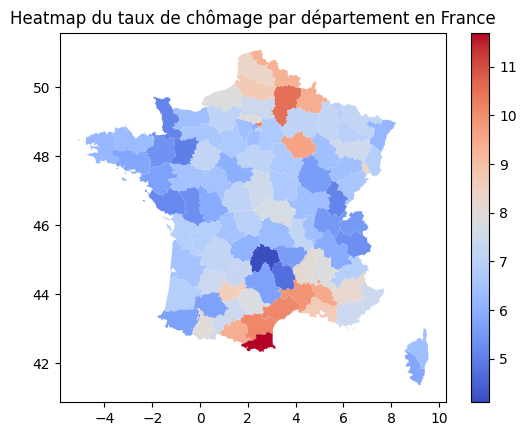

In [111]:
# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/tauxChomage.xlsx')

# Sélectionner les colonnes pertinentes
df_pourcent_chomage = df_resultats.iloc[:, [0, 2]]

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Calculer le taux de chômage moyen par département
pourcent_chomage = df_resultats.groupby('Departement')['Ensemble'].mean().reset_index()

# Fusionner les données de taux de chômage avec les données géographiques des départements
departements = departements.merge(pourcent_chomage, left_on='nom', right_on='Departement')

# Afficher la heatmap
fig, ax = plt.subplots()
departements.plot(column='Ensemble', cmap='coolwarm', ax=ax, legend=True)
ax.set_title("Heatmap du taux de chômage par département en France")
plt.show()


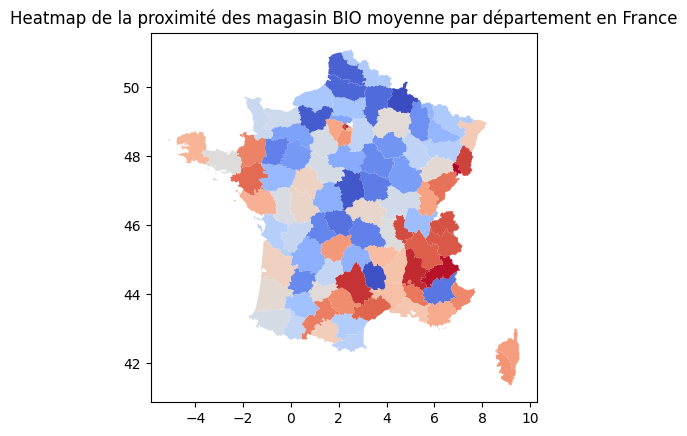

In [112]:
# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/MagasinBio2016.xls', sheet_name='Figure 2').dropna()

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Nommer les colonnes du DataFrame des résultats
df_resultats.columns = ['Departement', 'Proximité']

# Fusionner les données de proximité avec les données géographiques des départements
departements = departements.merge(df_resultats, left_on='nom', right_on='Departement')

# Afficher la heatmap
fig, ax = plt.subplots()
departements.plot(column='Proximité', cmap='coolwarm', ax=ax)
ax.set_title("Heatmap de la proximité des magasin BIO moyenne par département en France")
plt.show()



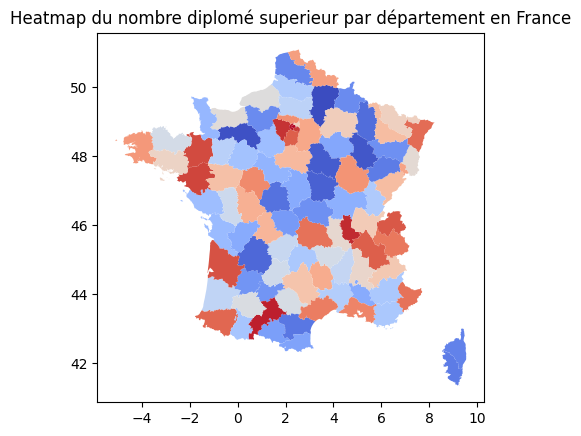

In [113]:
# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/NiveauEtudeJeune2017.xlsx', sheet_name='Figure 1a').dropna()

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

# Nommer les colonnes du DataFrame des résultats
df_resultats.columns = ['Code','Departement', 'niveauEtude']

# Fusionner les données de proximité avec les données géographiques des départements
departements = departements.merge(df_resultats, left_on='nom', right_on='Departement')

# Afficher la heatmap
fig, ax = plt.subplots()
departements.plot(column='niveauEtude', cmap='coolwarm', ax=ax)
ax.set_title("Heatmap du nombre diplomé superieur par département en France")
plt.show()

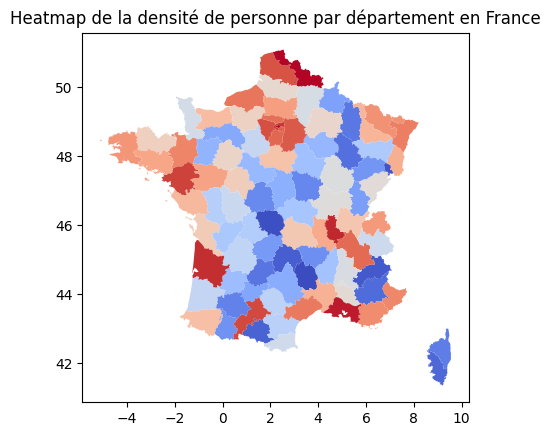

In [114]:
# Charger les données Excel dans un DataFrame pandas
df_resultats = pd.read_excel('AutreData/NbPopDepartement2023.xls', sheet_name='2023').dropna()

# Charger les données géographiques des départements français
departements = gpd.read_file('Carte/departements.geojson')

df_densitePop = df_resultats.iloc[:, [0, 1, 7]]

# Nommer les colonnes du DataFrame des résultats
df_densitePop.columns = ['Code','Departement', 'nbPersonne']

# Fusionner les données de proximité avec les données géographiques des départements
departements = departements.merge(df_densitePop, left_on='nom', right_on='Departement')

# Afficher la heatmap
fig, ax = plt.subplots()
departements.plot(column='nbPersonne', cmap='coolwarm', ax=ax)
ax.set_title("Heatmap de la densité de personne par département en France")
plt.show()

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données des résultats présidentiels
df_resultatPresidentielle = pd.read_excel('resultats-par-niveau-subcom-t2-france-entiere.xlsx')
df_resultatPresidentielle = df_resultatPresidentielle.iloc[:, [0, 1, 7, 24, 31]]
df_resultatPresidentielle.columns = ['Code', 'Departement', 'Absence', 'Macron', 'Lepen']

# Groupby sur 'Code' et 'Departement' pour calculer les moyennes
df_resultatPresidentielle = df_resultatPresidentielle.groupby(['Code', 'Departement'])[['Absence', 'Macron', 'Lepen']].mean().reset_index()


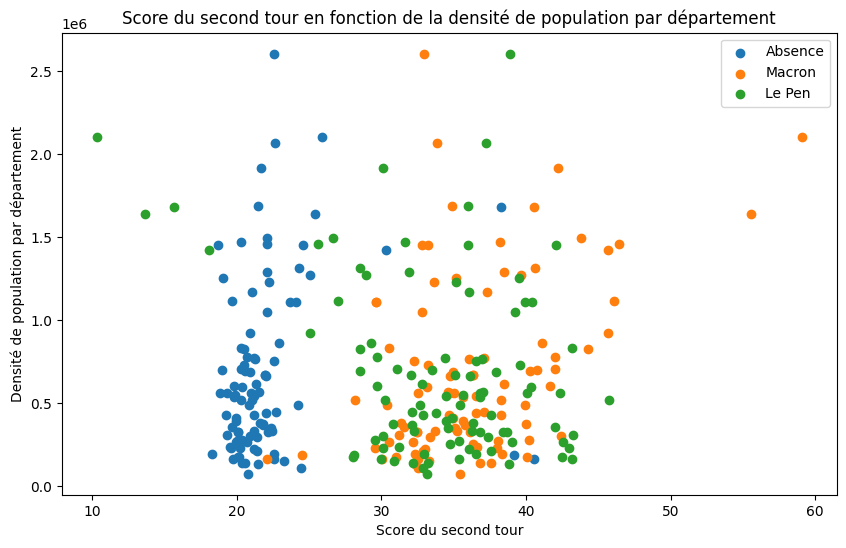

In [116]:
# Charger les données sur la densité de population
df_densite = pd.read_excel('AutreData/NbPopDepartement2023.xls', sheet_name='2023').dropna()
df_densitePop = df_densite.iloc[:, [0,1, 7]]
df_densitePop.columns = ['Code','Departement', 'nbPersonne']

# Concetanation
df_concat = pd.merge(df_densitePop, df_resultatPresidentielle, on='Code')

# Créer un graphe avec différentes couleurs pour chaque candidat
plt.figure(figsize=(10, 6))
plt.scatter(df_concat['Absence'], df_concat['nbPersonne'], label='Absence')
plt.scatter(df_concat['Macron'], df_concat['nbPersonne'], label='Macron')
plt.scatter(df_concat['Lepen'], df_concat['nbPersonne'], label='Le Pen')
plt.title('Score du second tour en fonction de la densité de population par département')
plt.xlabel('Score du second tour')
plt.ylabel('Densité de population par département')
plt.legend()
plt.show()


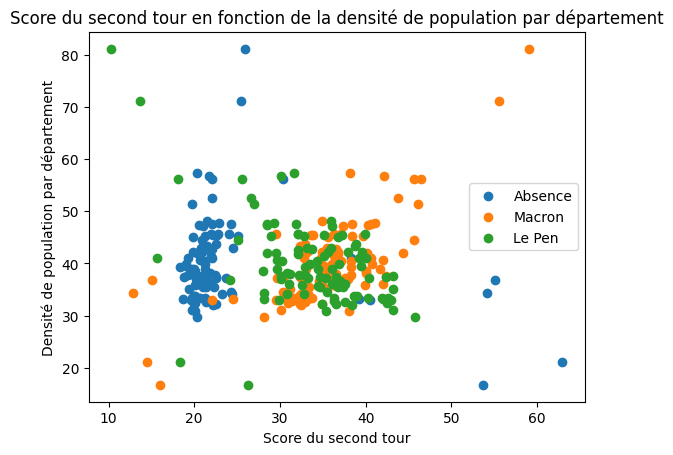

In [117]:
# Charger les données Excel dans un DataFrame pandas
df_niveauEtude = pd.read_excel('AutreData/NiveauEtudeJeune2017.xlsx', sheet_name='Figure 1a').dropna()
df_niveauEtude.columns = ['Code','Departement', 'niveauEtude']

df_concat = pd.merge(df_niveauEtude, df_resultatPresidentielle, on='Departement')

# Créer un graphe avec différentes couleurs pour chaque candidat
plt.figure()
plt.scatter(df_concat['Absence'], df_concat['niveauEtude'], label='Absence')
plt.scatter(df_concat['Macron'], df_concat['niveauEtude'], label='Macron')
plt.scatter(df_concat['Lepen'], df_concat['niveauEtude'], label='Le Pen')
plt.title('Score du second tour en fonction de la densité de population par département')
plt.xlabel('Score du second tour')
plt.ylabel('Densité de population par département')
plt.legend()
plt.show()

    Code                      Departement    Absence     Macron      Lepen
0     01                              Ain  21.940865  36.333715  35.088753
1     02                            Aisne  20.314581  28.182378  45.717572
2     03                           Allier  21.211451  33.702492  36.286530
3     04          Alpes-de-Haute-Provence  22.545000  32.519949  35.369394
4     05                     Hautes-Alpes  20.529691  36.798333  32.152407
..   ...                              ...        ...        ...        ...
102   ZP              Polynésie française  50.405208  26.922500  20.876458
103   ZS         Saint-Pierre-et-Miquelon  42.850000  24.605000  26.665000
104   ZW                 Wallis et Futuna  38.620000  40.270000  19.430000
105   ZX    Saint-Martin/Saint-Barthélemy  55.155000  18.705000  22.960000
106   ZZ  Français établis hors de France  62.395619  29.215857   6.448143

[107 rows x 5 columns]
    Code              Departement  niveauEtude
0     01                     

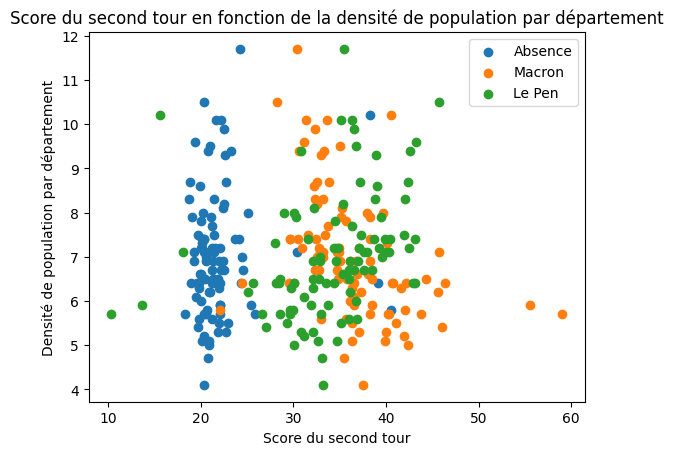

In [118]:
# Charger les données Excel dans un DataFrame pandas
df_pourcent_chomage = pd.read_excel('AutreData/tauxChomage.xlsx').dropna()

# Sélectionner les colonnes pertinentes
df_pourcent_chomage = df_pourcent_chomage.iloc[:, [0,1, 2]]
df_pourcent_chomage.columns = ['Code','Departement', 'niveauEtude']
print(df_resultatPresidentielle)
print(df_pourcent_chomage)

df_concat = pd.merge(df_pourcent_chomage, df_resultatPresidentielle, on='Code')
print(df_concat)

# Créer un graphe avec différentes couleurs pour chaque candidat
plt.figure()
plt.scatter(df_concat['Absence'], df_concat['niveauEtude'], label='Absence')
plt.scatter(df_concat['Macron'], df_concat['niveauEtude'], label='Macron')
plt.scatter(df_concat['Lepen'], df_concat['niveauEtude'], label='Le Pen')
plt.title('Score du second tour en fonction de la densité de population par département')
plt.xlabel('Score du second tour')
plt.ylabel('Densité de population par département')
plt.legend()
plt.show()

In [119]:
# Charger les données Excel dans un DataFrame pandas
df_pourcent_chomage = pd.read_excel('AutreData/tauxChomage.xlsx').dropna()
df_pourcent_chomage = df_pourcent_chomage.iloc[:, [1, 2]]
df_pourcent_chomage.columns = ['Departement', 'tauxChomage']

df_niveauEtude = pd.read_excel('AutreData/NiveauEtudeJeune2017.xlsx', sheet_name='Figure 1a').dropna()
df_niveauEtude = df_niveauEtude.iloc[:, [1, 2]]
df_niveauEtude.columns = ['Departement', 'niveauEtude']

df_densite = pd.read_excel('AutreData/NbPopDepartement2023.xls', sheet_name='2023').dropna()
df_densitePop = df_densite.iloc[:, [1, 7]]
df_densitePop.columns = ['Departement', 'nbPersonne']

# Charger les données des résultats présidentiels
df_resultatPresidentielle = pd.read_excel('resultats-par-niveau-subcom-t2-france-entiere.xlsx')
df_resultatPresidentielle = df_resultatPresidentielle.iloc[:, [1, 25, 32]]
df_resultatPresidentielle.columns = [ 'Departement', 'Macron', 'Lepen']

# Groupby sur 'Code' et 'Departement' pour calculer les moyennes
df_resultatPresidentielle = df_resultatPresidentielle.groupby('Departement')[['Macron', 'Lepen']].mean().reset_index()

df_concat = pd.merge(df_densitePop, df_resultatPresidentielle, on='Departement')
df_concat = pd.merge(df_concat, df_niveauEtude, on='Departement')
df_concat = pd.merge(df_concat, df_pourcent_chomage, on='Departement')
print(df_concat)

                Departement nbPersonne     Macron      Lepen niveauEtude  \
0                       Ain     671937  50.982366  49.017659        41.4   
1                     Aisne     522791  38.089161  61.910914        29.7   
2                    Allier     332443  48.201987  51.798013        33.4   
3   Alpes-de-Haute-Provence     166654  47.890556  52.109697        37.2   
4              Hautes-Alpes     139942  53.414383  46.585802        41.7   
..                      ...        ...        ...        ...         ...   
92           Hauts-de-Seine    1642002  80.148611  19.851389        71.1   
93        Seine-Saint-Denis    1682806  72.259500  27.740500          41   
94             Val-de-Marne    1426748  71.616596  28.383404        56.1   
95               Val-d'Oise    1274374  58.109402  41.890707        45.2   
96                   Guyane     301099  44.915909  55.084545          21   

    tauxChomage  
0           5.5  
1          10.5  
2           7.7  
3           8.2

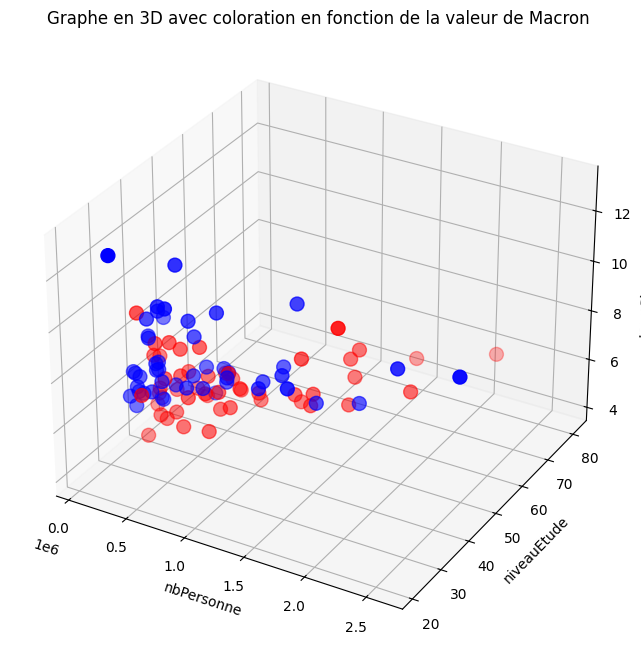

In [120]:
# Création de la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Coloration des points en fonction de la valeur de Macron
colors = ['blue' if x <= 50 else 'red' for x in df_concat['Macron'] ]

# Affichage du nuage de points en 3D
ax.scatter(df_concat['nbPersonne'], df_concat['niveauEtude'], df_concat['tauxChomage'], c=colors, s=100)

# Ajout des labels
ax.set_xlabel('nbPersonne')
ax.set_ylabel('niveauEtude')
ax.set_zlabel('tauxChomage')

# Affichage du graphe
plt.title('Graphe en 3D avec coloration en fonction de la valeur de Macron')
plt.show()

In [121]:
#PCA
df_pourcent_chomage = pd.read_excel('AutreData/tauxChomage.xlsx').dropna()
df_pourcent_chomage = df_pourcent_chomage.iloc[:, [1, 2]]
df_pourcent_chomage.columns = ['Departement', 'tauxChomage']

df_niveauEtude = pd.read_excel('AutreData/NiveauEtudeJeune2017.xlsx', sheet_name='Figure 1a').dropna()
df_niveauEtude = df_niveauEtude.iloc[:, [1, 2]]
df_niveauEtude.columns = ['Departement', 'niveauEtude']

df_densitePop = pd.read_excel('AutreData/NbPopDepartement2023.xls', sheet_name='2023').dropna()
df_densitePop = df_densitePop.iloc[:, [1, 7]]
df_densitePop.columns = ['Departement', 'nbPersonne']

df_magasinBIO = pd.read_excel('AutreData/MagasinBio2016.xls', sheet_name='Figure 2').dropna()
df_magasinBIO.columns = ['Departement', 'Proximité']

df_PopImmigre = pd.read_excel('AutreData/PopImmigré.xlsx').dropna()
df_PopImmigre = df_PopImmigre.iloc[:, [1, 2]]
df_PopImmigre.columns = ['Departement', 'Immigré']

# Charger les données des résultats présidentiels
df_resultatPresidentielle = pd.read_excel('resultats-par-niveau-subcom-t2-france-entiere.xlsx').dropna()
df_resultatPresidentielle = df_resultatPresidentielle.iloc[:, [1, 25, 32]]
df_resultatPresidentielle.columns = [ 'Departement', 'Macron', 'Lepen']
df_resultatPresidentielle = df_resultatPresidentielle.groupby('Departement')[['Macron', 'Lepen']].mean().reset_index()

df_concat = pd.merge(df_densitePop, df_resultatPresidentielle, on='Departement')
df_concat = pd.merge(df_concat, df_niveauEtude, on='Departement')
df_concat = pd.merge(df_concat, df_pourcent_chomage, on='Departement')
df_concat = pd.merge(df_concat, df_magasinBIO, on='Departement')
df_concat = pd.merge(df_concat, df_PopImmigre, on='Departement')
print(df_concat)

# Sélection des features
features = df_concat.drop(['Departement','Macron', 'Lepen'], axis=1)
y = [0 if x <= 50 else 1 for x in df_concat['Macron']]
print(y)
print(features)

                Departement nbPersonne     Macron      Lepen niveauEtude  \
0                       Ain     671937  50.982366  49.017659        41.4   
1                     Aisne     522791  38.089161  61.910914        29.7   
2                    Allier     332443  48.201987  51.798013        33.4   
3   Alpes-de-Haute-Provence     166654  47.890556  52.109697        37.2   
4              Hautes-Alpes     139942  53.414383  46.585802        41.7   
..                      ...        ...        ...        ...         ...   
89    Territoire de Belfort     136891  45.499208  54.500792        43.3   
90                  Essonne    1316053  58.871340  41.128711        47.5   
91           Hauts-de-Seine    1642002  80.148611  19.851389        71.1   
92             Val-de-Marne    1426748  71.616596  28.383404        56.1   
93               Val-d'Oise    1274374  58.109402  41.890707        45.2   

    tauxChomage Proximité   Immigré  
0           5.5      1.66   79312.0  
1          

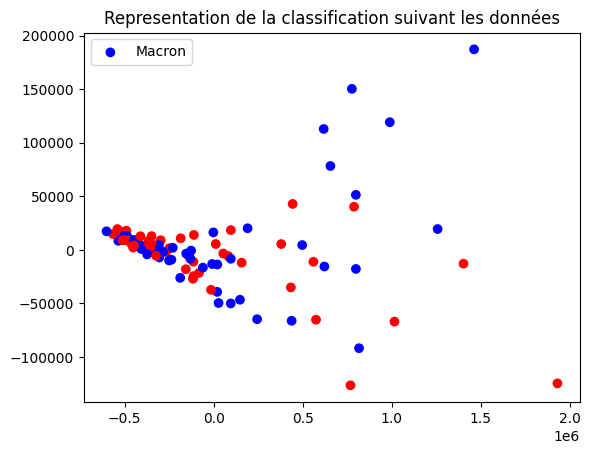

In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Réduction de dimension avec PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

#df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
# Affichage du DataFrame avec les composantes principales
#print(X_pca)

# Affichage du pourcentage de variance expliquée par chaque composante
#print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)


plt.figure()

plt.scatter(X_pca[:,0], X_pca[:,1], color=['red' if x <= 50 else 'blue' for x in df_concat['Macron']])
plt.title('Representation de la classification suivant les données')
plt.legend(['Macron', 'Le Pen'])
plt.show()